<a href="https://colab.research.google.com/github/cristiancastano852/Predict-students-dropout-and-academic-success/blob/main/05_modelo_de_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset that was downloaded from https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_Dec21_updated.csv is read.

In [1]:
# Traemos los datos desde GitHub
! git clone https://github.com/cristiancastano852/Predict-students-dropout-and-academic-success

Cloning into 'Predict-students-dropout-and-academic-success'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 3), reused 5 (delta 2), pack-reused 0
Unpacking objects: 100% (9/9), 212.43 KiB | 2.47 MiB/s, done.


In [2]:
#Importamos las librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

In [3]:


#Leemos nuestros datos
df = pd.read_csv('/content/Predict-students-dropout-and-academic-success/dataset_procesado.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,13,10,6,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,3,4,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,22,27,10,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,23,27,6,4,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,22,28,10,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,6,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,15,1,1,1,1,10,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,22,27,10,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,22,27,8,5,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [4]:
#Nuestra columna a predecir se llama 'Target'
X = df.drop('Target', axis=1)
y = df['Target']

In [5]:
# dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# crear y ajustar el modelo KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# calcular el LogLoss
logloss = log_loss(y_test, knn.predict_proba(X_test))
print('LogLoss:', logloss)

LogLoss: 5.949321059388657


In [9]:
# realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo:', accuracy)

Precisión del modelo: 0.6677966101694915


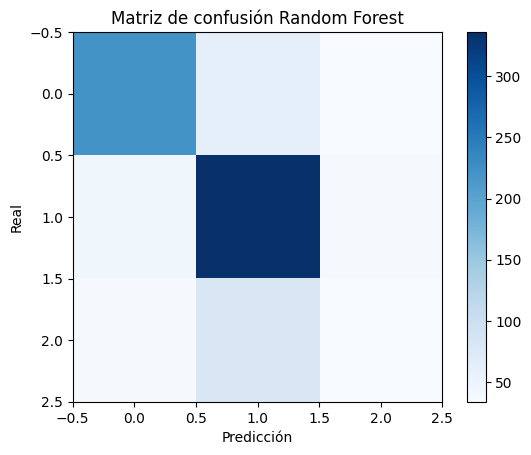

In [10]:
# Mostrar la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap="Blues")
plt.title("Matriz de confusión Random Forest")
plt.colorbar()
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Recordemos cual es cada clase

Dropout: 0

Graduate: 1

Enrolled': 2

In [11]:
# generar el informe de clasificación
class_report = classification_report(y_test, y_pred)
print('Informe de clasificación:\n', class_report)

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71       316
           1       0.71      0.80      0.75       418
           2       0.32      0.23      0.26       151

    accuracy                           0.67       885
   macro avg       0.59      0.58      0.58       885
weighted avg       0.65      0.67      0.66       885

